In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import os
import scipy.interpolate
import geopandas as gpd
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
path = './noaa-goes16/GLM-L2-LCFA/2019/301/00'
files = [os.path.join(path, file) for file in os.listdir(path)]
len(files)

180

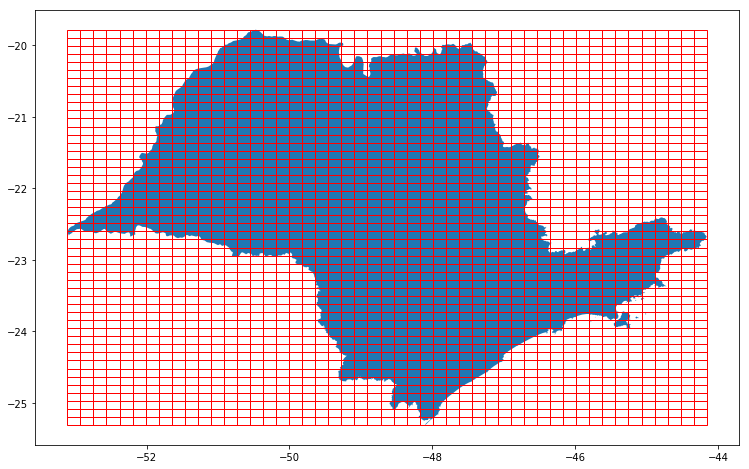

In [5]:
grid = 50
gdf = gpd.read_file('shapefiles/estadosl_2007.shp')
sp = gdf[gdf['NOMEUF2'] == 'SAO PAULO']
bounds = sp.bounds

lon = np.linspace(bounds.minx, bounds.maxx, grid)
lat = np.linspace(bounds.miny, bounds.maxy, grid)


fig, ax = plt.subplots(figsize=(15, 8))

sp.plot(ax=ax)
for i in range(grid-1):
    for j in range(grid-1):
        xy = (lon[j][0], lat[i][0]) 
        w = abs(lon[j+1] - lon[j])[0]
        h = abs(lat[i+1] - lat[i])[0]
        rec = patches.Rectangle(xy=xy, width=w, height=h, linewidth=1,edgecolor='r',facecolor='None')
        ax.add_patch(rec)

plt.show()


In [126]:
bounds.minx.values[0]

-53.10819293805582

In [114]:
bounds

,minx,miny,maxx,maxy
25,-53.108193,-25.310889,-44.160514,-19.779185


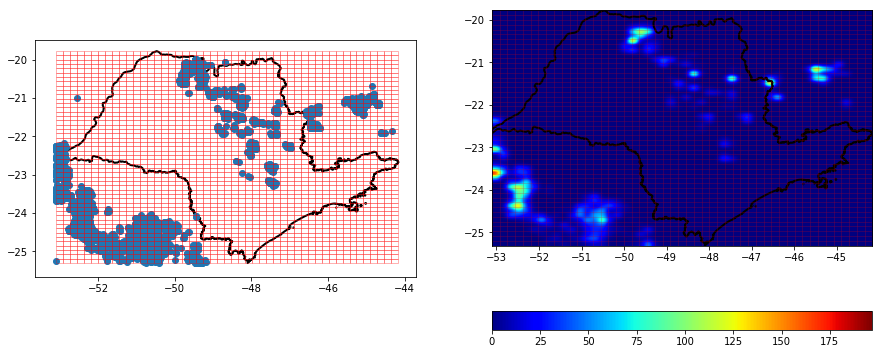

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
grid = 50
lon = np.linspace(bounds.minx, bounds.maxx, grid)
lat = np.linspace(bounds.miny, bounds.maxy, grid)
sp.plot(ax=ax[0], facecolor='None', edgecolor='k', linewidth=2)

for i in range(grid-1):
    for j in range(grid-1):
        xy = (lon[j][0], lat[i][0]) 
        w = abs(lon[j+1] - lon[j])[0]
        h = abs(lat[i+1] - lat[i])[0]
        rec = patches.Rectangle(xy=xy, width=w, height=h, linewidth=1, alpha=0.3, 
                                edgecolor='r',facecolor='None')
        ax[0].add_patch(rec)

lats, lons = [], []

minx, maxx = bounds.minx.values[0], bounds.maxx.values[0]
miny, maxy = bounds.miny.values[0], bounds.maxy.values[0]

for file in files:
    nc = Dataset(file)
    for lat, lon in zip(nc.variables['flash_lat'][:], 
                        nc.variables['flash_lon'][:]):
        if (lat >= miny and lat <= maxy) and (lon >= minx and lon <= maxx):
            lats.append(lat); lons.append(lon)
ax[0].scatter(lons, lats)

#
mat = np.zeros(shape=(grid, grid))
lon = np.linspace(bounds.minx, bounds.maxx, grid)
lat = np.linspace(bounds.miny, bounds.maxy, grid)

for r in range(grid-1):
    for c in range(grid-1):
        count = 0
        minx, maxx = lon[c], lon[c+1]
        miny, maxy = lat[r], lat[r+1]
        for z in range(len(lats)):
            if (lats[z] >= miny and lats[z] <= maxy) and (lons[z] >= minx and lons[z] <= maxx):
                mat[r][c] += 1
                
minx, maxx = bounds.minx.values[0], bounds.maxx.values[0]
miny, maxy = bounds.miny.values[0], bounds.maxy.values[0]
cmap = ax[1].imshow(np.flip(mat, axis=0), extent=[minx, maxx, miny, maxy], 
                  interpolation='gaussian', cmap='jet')
# divider = make_axes_locatable(ax[1])
# cax = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(cax)
fig.colorbar(cmap, orientation='horizontal')
sp.plot(ax=ax[1], facecolor='None', edgecolor='k', linewidth=2)

for i in range(grid-1):
    for j in range(grid-1):
        xy = (lon[j][0], lat[i][0]) 
        w = abs(lon[j+1] - lon[j])[0]
        h = abs(lat[i+1] - lat[i])[0]
        rec = patches.Rectangle(xy=xy, width=w, height=h, linewidth=1, alpha=0.1, 
                                edgecolor='r',facecolor='None')
        ax[1].add_patch(rec)

In [12]:
(maxy - miny)/50

0.11063408324920453

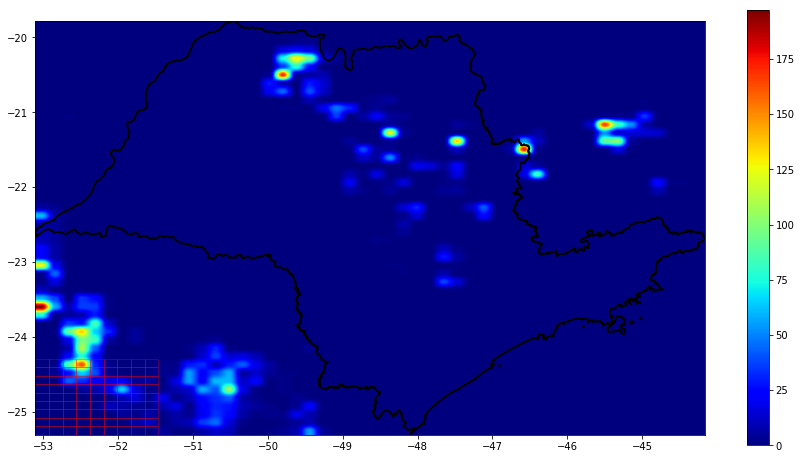

In [14]:
grid = 10
minx, maxx = bounds.minx.values[0], bounds.maxx.values[0]
miny, maxy = bounds.miny.values[0], bounds.maxy.values[0]
fig, ax = plt.subplots(figsize=(15, 8))
cmap = ax.imshow(np.flip(mat, axis=0), extent=[minx, maxx, miny, maxy], 
                  interpolation='hanning', cmap='jet')
fig.colorbar(cmap)
sp.plot(ax=ax, facecolor='None', edgecolor='k', linewidth=2)

for i in range(grid-1):
    for j in range(grid-1):
        xy = (lon[j][0], lat[i][0]) 
        w = abs(lon[j+1] - lon[j])[0]
        h = abs(lat[i+1] - lat[i])[0]
        rec = patches.Rectangle(xy=xy, width=w, height=h, linewidth=1, alpha=0.3, 
                                edgecolor='r',facecolor='None')
        ax.add_patch(rec)

In [198]:
mat = np.zeros(shape=(grid, grid))
lon = np.linspace(bounds.minx, bounds.maxx, grid)
lat = np.linspace(bounds.miny, bounds.maxy, grid)

for r in range(grid-1):
    for c in range(grid-1):
        count = 0
        minx, maxx = lon[c], lon[c+1]
        miny, maxy = lat[r], lat[r+1]
        for z in range(len(lats)):
            if (lats[z] >= miny and lats[z] <= maxy) and (lons[z] >= minx and lons[z] <= maxx):
                mat[r][c] += 1
mat

array([[  1.,   0.,   9.,  23.,  70., 128.,   5.,  92.,  14.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   5.,  73.,  62.,  79., 197.,  18.,  38.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  9., 185., 116.,  13., 231., 359.,  53.,   6.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 29., 472.,   1.,   6.,  87., 139.,  77.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 11., 584.,  33.,   0.,   8.,  22.,   0.,   3.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [249., 233.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [225., 127.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [104.,   0.,   0.,   0.,   0.,   0

In [189]:
mat = np.zeros(shape=(grid, grid))
for x in range(grid):
        mat[x][y] = np.random.random()*x+y
mat

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        , 19.        ],
       [ 0.6353505 ,  1.89947451,  2.04140678,  3.1616798 ,  4.59323797,
         5.21214849,  6.73036209,  7.55332978,  8.23069781,  9.68678547,
        10.73839265, 11.18357979, 12.30245982, 13.33351104, 14.96316283,
        15.92597512, 16.43772608, 17.24636225, 18.71490217, 19.31801572],
       [ 1.86522498,  1.66744569,  2.41293352,  3.1832995 ,  5.09645516,
         5.89846303,  7.5935659 ,  8.10745744,  9.6790531 ,  9.32729072,
        11.76199398, 12.48548983, 12.82859017, 14.71793842, 15.05601015,
        15.00556148, 16.4359604 , 17.27306323, 19.32942741, 20.76373273],
       [ 0.64022344,  1.20180141,  3.28737091,  4.98461214,  5.21636718,
         6.64965624,  8.63572718,  8.51955047,  

In [59]:
lon, lat = [], []
for file in files:
    nc = Dataset(file)
    for x, y in zip(nc.variables['flash_lon'][:], nc.variables['flash_lat'][:]):
        lat.append(x)
        lon.append(y)

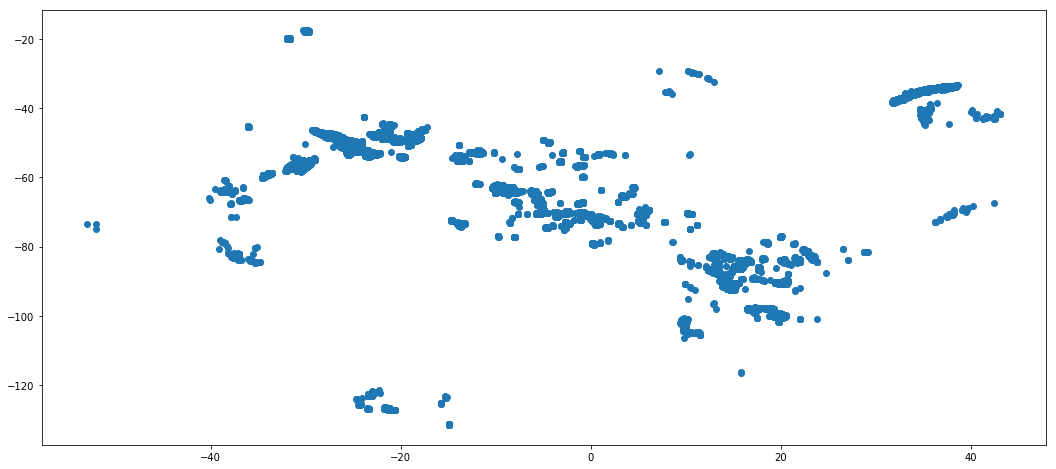

In [60]:
# bbox = [-53.08059692, -25.25489044, -44.20065689, -19.78015137]
bbox = [-64.08059692, -32.25489044, -40.20065689, -10.78015137]
plt.figure(figsize=(18, 8))
# m = Basemap(projection='merc', llcrnrlon=bbox[0], llcrnrlat=bbox[1], 
#             urcrnrlon=bbox[2], urcrnrlat=bbox[3], resolution='h')
# m.drawstates()

plt.scatter(lon, lat, zorder=999)

In [83]:
len(lat)**2

1918177209

TypeError: Shape of x does not match that of z: found (100, 100) instead of (2, 2).

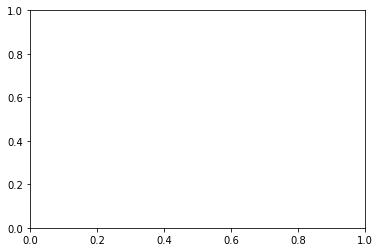

In [87]:
data, _, _ = np.histogram2d(lon[:100], lat[:100], 2)
data = data.T
lx, ly = np.meshgrid(lon[:100], lat[:100])
c = plt.contourf(lx, ly, data)
plt.colorbar(c)


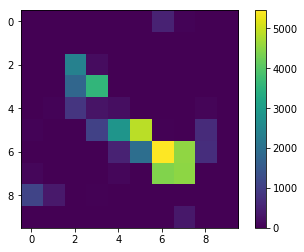

In [79]:
h, _, _ = np.histogram2d(lon, lat, 10)
c = plt.imshow(np.flip(h.T, axis=1), )
plt.colorbar(c)
